# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [4]:
spaceship.shape


(8693, 14)

**Check for data types**

In [5]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [6]:
spaceship.isna().sum()


,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value.

In [7]:
spaceship = spaceship.dropna()

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [8]:

def create_mapping_dict(series):
    """Creates a dictionary for mapping values with b'...' prefixes to cleaned values.

    Args:
        series: A pandas Series containing the values to be mapped.

    Returns:
        A dictionary where keys are the original values (as strings)
        and values are the cleaned strings without b'...' prefixes.
    """

    mapping_dict = {}
    for value in series.unique():
        # Convert the value to string to ensure consistent key type
        key = str(value)
        # Clean the value if it's a byte string, otherwise keep it as is
        cleaned_value = str(value)[:1]
        mapping_dict[key] = cleaned_value
    return mapping_dict

spaceship["Cabin"]=spaceship["Cabin"].map(create_mapping_dict(spaceship["Cabin"]))
spaceship["Cabin"]


<ipython-input-8-5638770af35d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship["Cabin"]=spaceship["Cabin"].map(create_mapping_dict(spaceship["Cabin"]))


,Cabin
0,B
1,F
2,A
3,A
4,F
...,...
8688,A
8689,G
8690,G
8691,E


- Drop PassengerId and Name

In [9]:
spaceship=spaceship.drop(columns=["PassengerId", "Name"])
spaceship

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


- For non-numerical columns, do dummies.

In [10]:
cat_cols=["HomePlanet","Cabin","Destination","VIP","CryoSleep"]

In [11]:
spaceship_oh=pd.get_dummies(spaceship, columns=cat_cols, drop_first=True)
spaceship_oh
spaceship_oh_no_target=spaceship_oh.drop(columns="Transported")
spaceship_oh_no_target

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,CryoSleep_True
0,39.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,False,False,False,False,False,False,True,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,False,False,False,False,False,False,True,False,False,False,True,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,True,False,False,False,False,False,False,False,False,False,True,True,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,True,False,False,False,False,False,False,False,False,False,True,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,False,False,False,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,True,False,False,False,False,False,False,False,False,False,False,True,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,True,False,True,False,False,True
8690,26.0,0.0,0.0,1872.0,1.0,0.0,False,False,False,False,False,False,False,True,False,False,True,False,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,True,False,False,False,False,True,False,False,False,False,False,False,False


**Perform Train Test Split**

In [12]:
target = spaceship_oh["Transported"]

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [13]:


X_train, X_test, y_train, y_test = train_test_split(spaceship_oh_no_target, target, test_size=0.20, random_state=41)

- Evaluate your model's performance. Comment it

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)


In [15]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,CryoSleep_True
0,0.265823,0.00000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.025316,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.367089,0.00000,0.000000,0.000000,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.215190,0.00998,0.017308,0.160532,0.0,0.000295,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.253165,0.00000,0.023111,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,CryoSleep_True
0,0.253165,0.0,0.003254,0.059169,0.001160,0.005114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.240506,0.0,0.000000,0.000000,0.021599,0.016916,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.177215,0.0,0.000000,0.062515,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.556962,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.506329,0.0,0.000000,0.035338,0.015307,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=10)

In [18]:
knn.score(X_test_norm, y_test)

0.7609682299546142

In [21]:
# start a tree classify model
X=spaceship_oh_no_target
y=target
df = pd.concat([X,y], axis = 1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6606 non-null   float64
 1   RoomService                6606 non-null   float64
 2   FoodCourt                  6606 non-null   float64
 3   ShoppingMall               6606 non-null   float64
 4   Spa                        6606 non-null   float64
 5   VRDeck                     6606 non-null   float64
 6   HomePlanet_Europa          6606 non-null   bool   
 7   HomePlanet_Mars            6606 non-null   bool   
 8   Cabin_B                    6606 non-null   bool   
 9   Cabin_C                    6606 non-null   bool   
 10  Cabin_D                    6606 non-null   bool   
 11  Cabin_E                    6606 non-null   bool   
 12  Cabin_F                    6606 non-null   bool   
 13  Cabin_G                    6606 non-null   bool   
 1

In [29]:
features = df.drop(columns = ["Transported"])
target = df["Transported"]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state = 42 )

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred = log_reg.predict_proba(X_test)
pred

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[0.03876451, 0.96123549],
       [0.21141682, 0.78858318],
       [0.36462456, 0.63537544],
       ...,
       [0.07653141, 0.92346859],
       [0.0263669 , 0.9736331 ],
       [0.50952185, 0.49047815]])

In [35]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

accuracy_score(y_test, log_reg.predict(X_test))

0.7783661119515886

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [43]:
pred = tree_classifier.predict(X_test_norm)
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred, y_test)))
print("R2 score", tree_classifier.score(X_test_norm, y_test))

MAE 0.4939485627836611
RMSE 0.7028147428616315
R2 score 0.5060514372163388


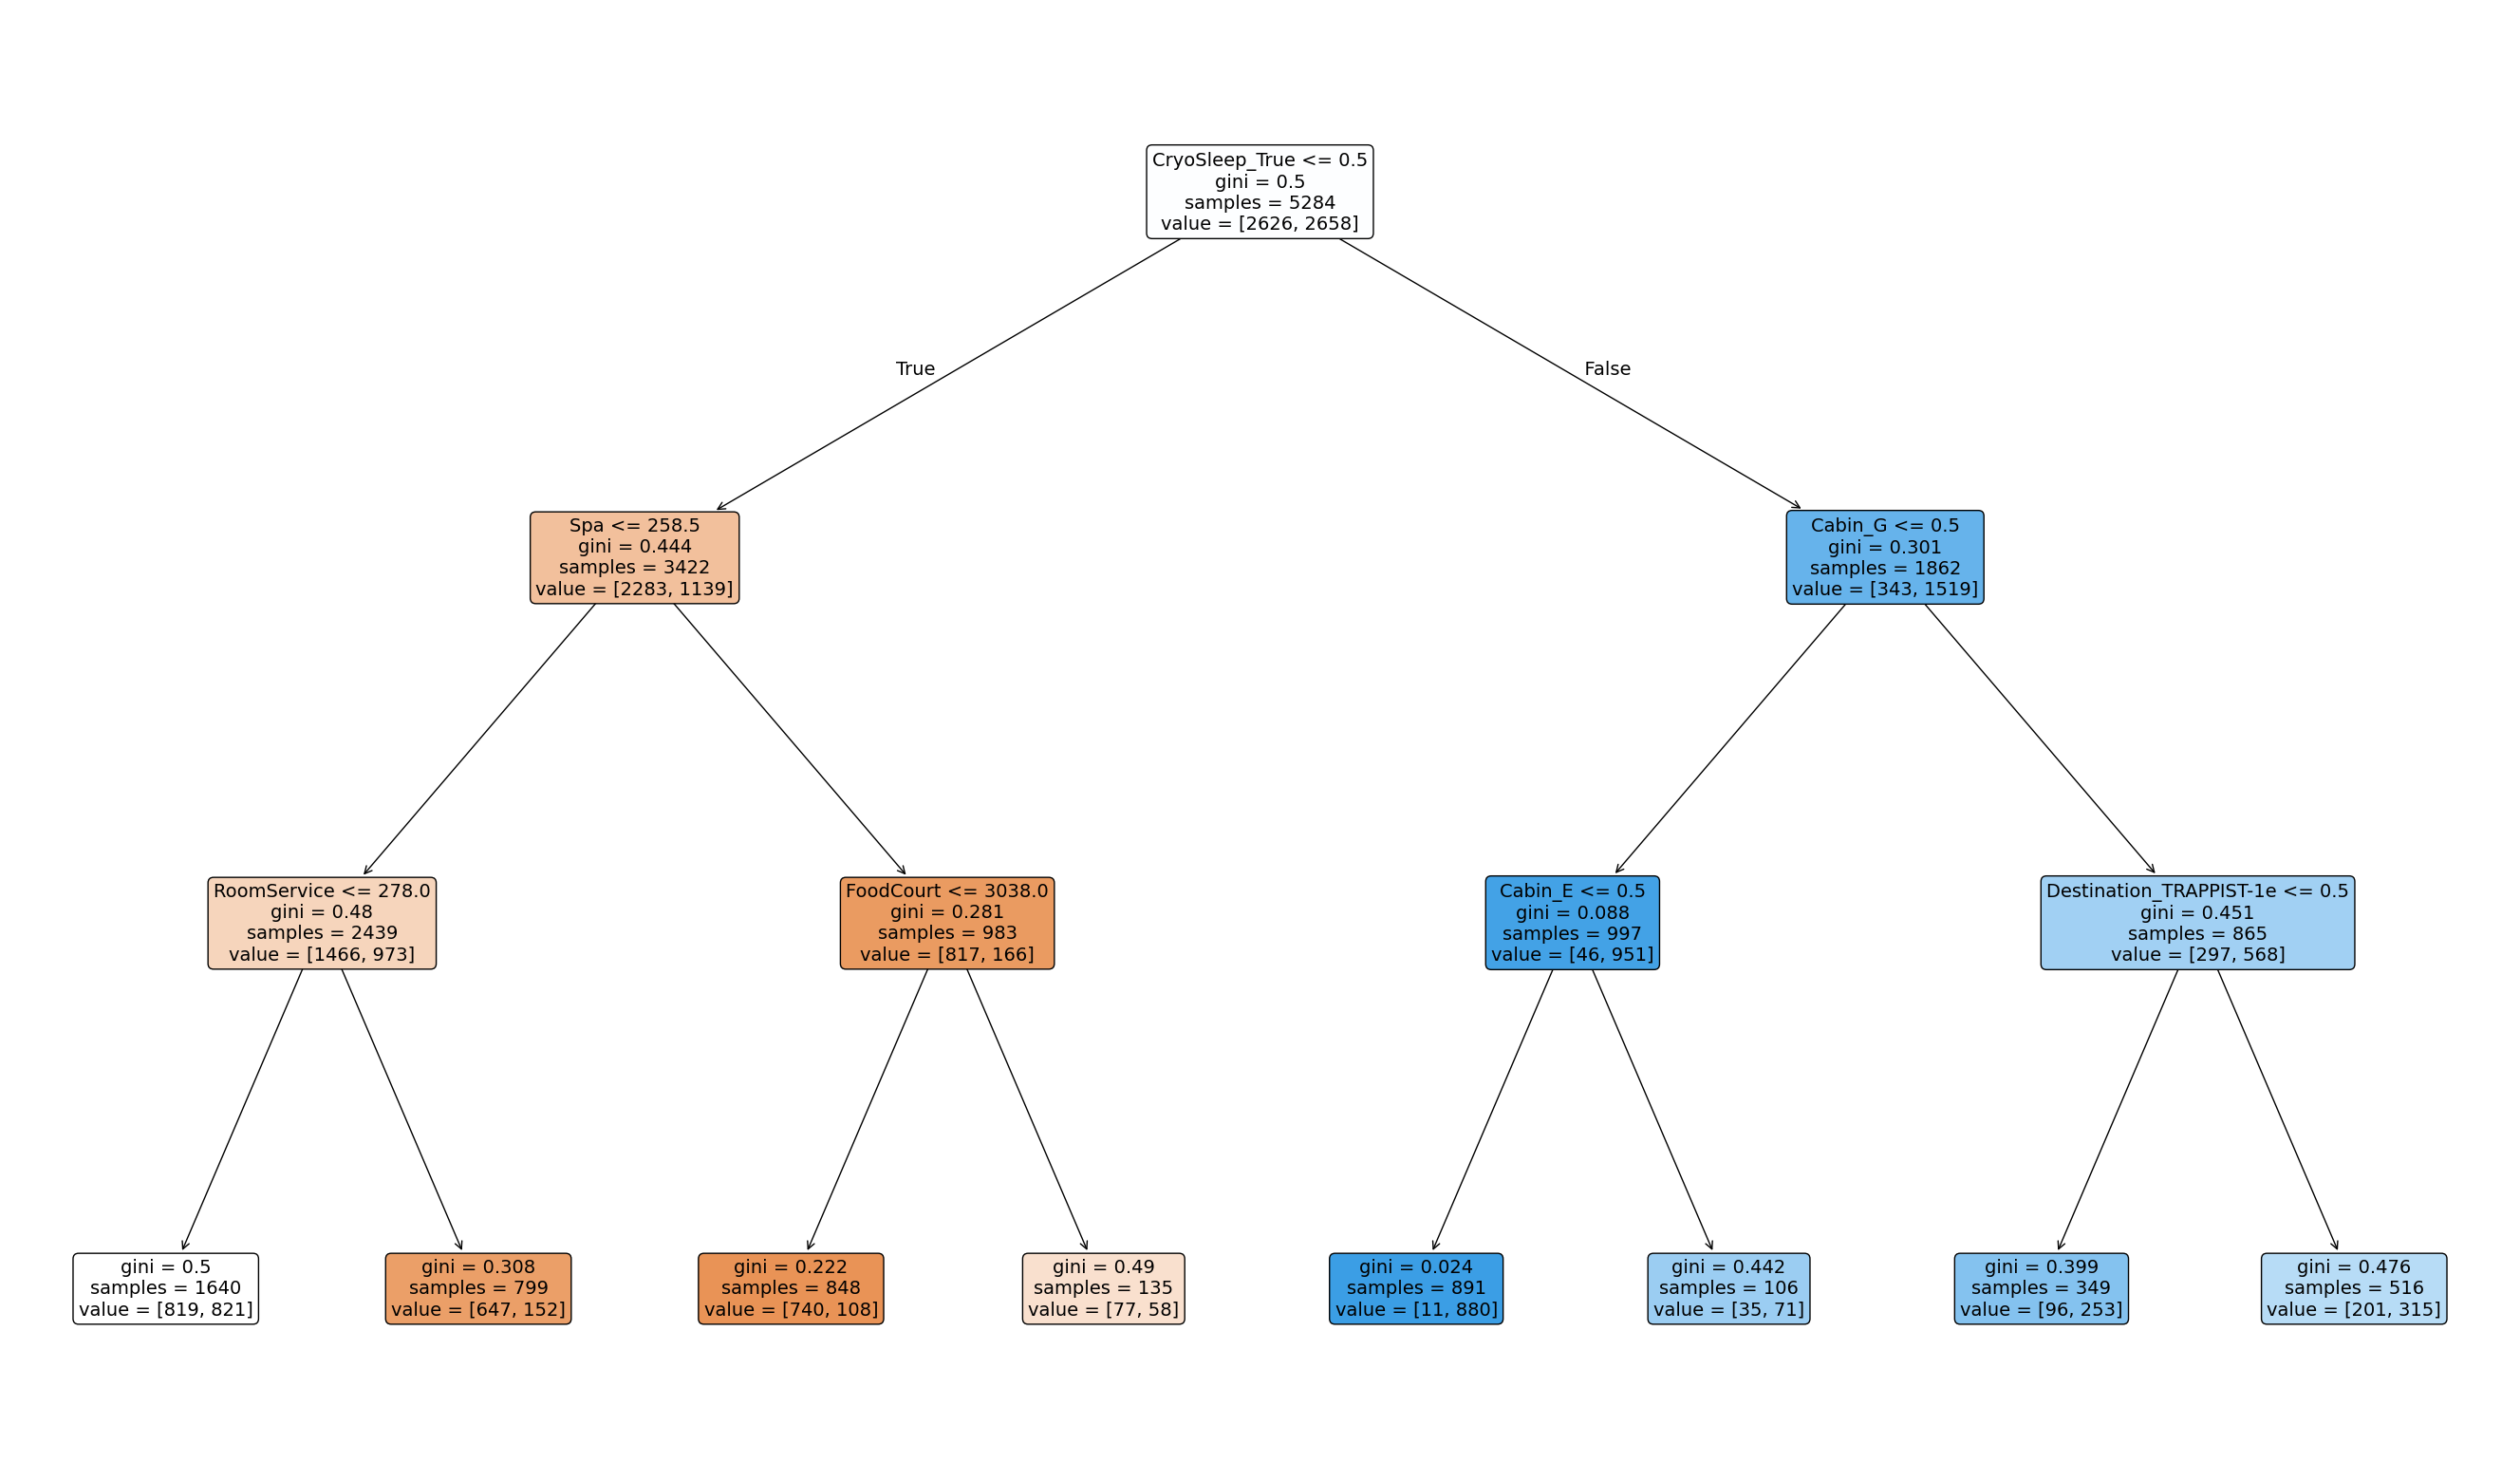

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(tree_classifier,filled = True, rounded=True,feature_names=list(X_train.columns))
plt.show()